In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import h5py
from random import shuffle

import pykitti
import pykitti_obj

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Raw Data directory information
basedir = 'KITTI_road/training/'


dataset = pykitti_obj.obj(basedir)

h5_file_name='KITTI_set_sph1.h5'
fid    = h5py.File(h5_file_name, 'w')
x_dset = fid.create_dataset('img', (len(dataset)*11,64,180,14), dtype='float32',chunks=(16,64,180,14))
y_dset = fid.create_dataset('gt' , (len(dataset)*11,64,180)    , dtype='float32',chunks=(16,64,180))


In [3]:
# assign generator

cam2_iterator   = dataset.cam2
velo_iterator   = dataset.velo
calib_iterator  = dataset.calib
gt_BEV_iterator = dataset.gt_road_BEV
gt_img_iterator = dataset.gt_img
print len(dataset)

289


In [4]:
list_shuffle=range(len(dataset)*11)
shuffle(list_shuffle)
# print list_shuffle

In [5]:

for i_sample in range(len(dataset)):
# for i_sample in [2]:
    cam2   = next(cam2_iterator)
    velo   = next(velo_iterator)
    calib  = next(calib_iterator)
    gt_BEV = next(gt_BEV_iterator)
    gt     = next(gt_img_iterator)
    sph        = pykitti_obj.xyz2sph(velo)
    data_sph   = pykitti_obj.sph_prepare2(sph,50)
    gt_BEV_img = pykitti_obj.read_gt_BEV(gt_BEV)
    gt_img     = pykitti_obj.read_gt_img(gt)
    Tr_velo_to_img = pykitti_obj.read_calib_file(calib)

    label      = pykitti_obj.img_label_prepare(data_sph,gt_img,Tr_velo_to_img)


    for j in range(11):
        x_dset[list_shuffle[i_sample*11+j],:,:,:]=data_sph[:,j*2:j*2+180,:]
        y_dset[list_shuffle[i_sample*11+j],:,:]  =label[:,j*2:j*2+180]
        
        y_img=Image.fromarray(np.uint8(y_dset[list_shuffle[i_sample*5+j],:,:]*255))
        y_img.save(basedir+'gt1/{:04d}.png'.format(list_shuffle[i_sample*5+j]))

    

    print "finish  frame {:5d}".format(i_sample)

finish  frame     0
finish  frame     1
finish  frame     2
finish  frame     3
finish  frame     4
finish  frame     5
finish  frame     6
finish  frame     7
finish  frame     8
finish  frame     9
finish  frame    10
finish  frame    11
finish  frame    12
finish  frame    13
finish  frame    14
finish  frame    15
finish  frame    16
finish  frame    17
finish  frame    18
finish  frame    19
finish  frame    20
finish  frame    21
finish  frame    22
finish  frame    23
finish  frame    24
finish  frame    25
finish  frame    26
finish  frame    27
finish  frame    28
finish  frame    29
finish  frame    30
finish  frame    31
finish  frame    32
finish  frame    33
finish  frame    34
finish  frame    35
finish  frame    36
finish  frame    37
finish  frame    38
finish  frame    39
finish  frame    40
finish  frame    41
finish  frame    42
finish  frame    43
finish  frame    44
finish  frame    45
finish  frame    46
finish  frame    47
finish  frame    48
finish  frame    49


In [6]:
# Image.fromarray(np.uint8(data_sph[:,:,3]))
# data_sph[:,:,1]

In [7]:
label.shape

(64, 200)

In [8]:
# for i in range(200):
#     print label[:,i]

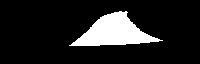

In [9]:
Image.fromarray(np.uint8(label*255))

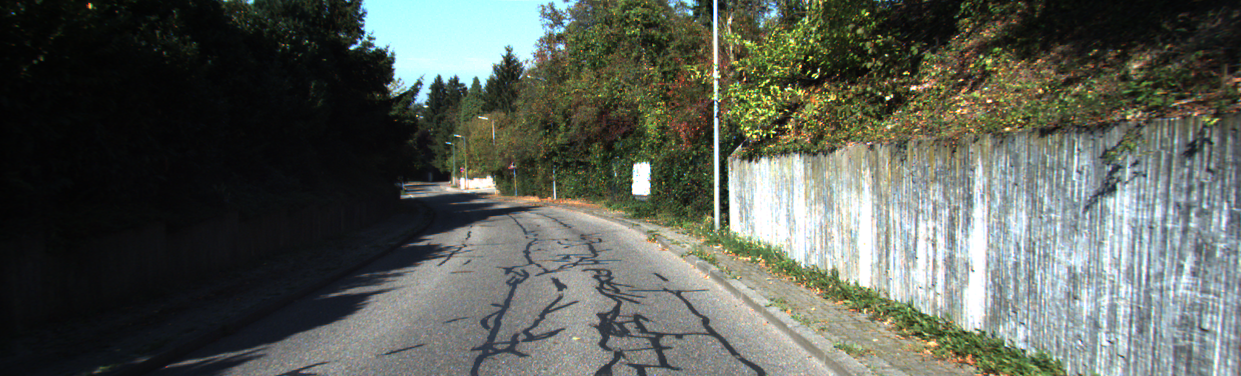

In [10]:
Image.fromarray(np.uint8(cam2*255))

In [11]:
fid.close()

In [12]:
# first_cam2=cam2
# third_velo=velo

# # Display some of the data
# np.set_printoptions(precision=4, suppress=True)
# # print('\nDrive: ' + str(dataset.drive))
# print('\nFrame range: ' + str(dataset.frames))

# # print('\nIMU-to-Velodyne transformation:\n' + str(dataset.calib.T_velo_imu))
# # print('\nGray stereo pair baseline [m]: ' + str(dataset.calib.b_gray))
# # print('\nRGB stereo pair baseline [m]: ' + str(dataset.calib.b_rgb))

# # print('\nFirst timestamp: ' + str(dataset.timestamps[0]))
# # print('\nSecond IMU pose:\n' + str(second_pose))

# f, ax = plt.subplots(2, 2, figsize=(15, 5))
# # ax[0, 0].imshow(first_gray[0], cmap='gray')
# # ax[0, 0].set_title('Left Gray Image (cam0)')

# # ax[0, 1].imshow(first_cam1, cmap='gray')
# # ax[0, 1].set_title('Right Gray Image (cam1)')

# ax[1, 0].imshow(first_cam2)
# ax[1, 0].set_title('Left RGB Image (cam2)')

# # ax[1, 1].imshow(first_rgb[1])
# # ax[1, 1].set_title('Right RGB Image (cam3)')


# f2 = plt.figure()
# ax2 = f2.add_subplot(111, projection='3d')
# # Plot every 100th point so things don't get too bogged down
# velo_range = range(0, third_velo.shape[0], 100)
# ax2.scatter(third_velo[velo_range, 0],
#             third_velo[velo_range, 1],
#             third_velo[velo_range, 2],
#             c=third_velo[velo_range, 3],
#             cmap='gray')
# ax2.set_title('Third Velodyne scan (subsampled)')

# plt.show()